## Name: Saksham Jain
## Email-ID: sakshamgr8online@gmail.com

# SkyGeni – Sales Intelligence Challenge
## Designing a Data-Driven Insight System for CRO Decision-Making

**Objective:** Investigate declining win rates despite a healthy pipeline and design an actionable intelligence system.


In [103]:
import pandas as pd
import numpy as np
import seaborn as sns

# Part 1 – Problem Understanding & Framing

## Real Business Problem
Win rates are declining despite strong pipeline volume.  
This indicates a conversion leakage problem rather than a lead-generation issue.

The CRO needs visibility into:
- Where deals fail in the funnel
- Which segments underperform
- Which deals are currently high-risk
- What actions should be taken


In [104]:
df = pd.read_csv("skygeni_sales_data.csv")
df.head()

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,Lost


## Basic Data Insights

In [105]:
df.shape

(5000, 12)

In [106]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   deal_id           5000 non-null   str  
 1   created_date      5000 non-null   str  
 2   closed_date       5000 non-null   str  
 3   sales_rep_id      5000 non-null   str  
 4   industry          5000 non-null   str  
 5   region            5000 non-null   str  
 6   product_type      5000 non-null   str  
 7   lead_source       5000 non-null   str  
 8   deal_stage        5000 non-null   str  
 9   deal_amount       5000 non-null   int64
 10  sales_cycle_days  5000 non-null   int64
 11  outcome           5000 non-null   str  
dtypes: int64(2), str(10)
memory usage: 468.9 KB


In [107]:
df.describe()

,deal_amount,sales_cycle_days
count,5000.000000,5000.000000
mean,26286.492800,63.751800
std,27689.230136,32.731405
min,2002.000000,7.000000
25%,6611.000000,35.750000
50%,14171.500000,64.000000
75%,39062.250000,92.000000
max,100000.000000,120.000000


In [108]:
df.nunique()


deal_id             5000
created_date         451
closed_date          547
sales_rep_id          25
industry               5
region                 4
product_type           3
lead_source            4
deal_stage             5
deal_amount         4644
sales_cycle_days     114
outcome                2
dtype: int64

In [109]:
cols = ["sales_rep_id", "industry", "region", "product_type", "lead_source", "deal_stage", "outcome"]

unique_values = df[cols].apply(lambda col: col.unique().tolist())
unique_values


sales_rep_id    [rep_22, rep_7, rep_5, rep_18, rep_2, rep_12, ...
industry           [SaaS, HealthTech, FinTech, EdTech, Ecommerce]
region                       [North America, India, APAC, Europe]
product_type                              [Enterprise, Core, Pro]
lead_source                [Referral, Inbound, Partner, Outbound]
deal_stage       [Qualified, Closed, Proposal, Negotiation, Demo]
outcome                                               [Won, Lost]
dtype: object

# Part 2 – Exploratory Data Analysis

The following analysis identifies patterns contributing to declining win rates.
Focus areas:
- Funnel stage performance
- Sales cycle duration
- Industry and region performance
- Lead source quality


In [110]:
import matplotlib.pyplot as plt

# Parsing the dates
df['created_date'] = pd.to_datetime(df['created_date'])
df['closed_date'] = pd.to_datetime(df['closed_date'])

# Binary notation for outcomes
df['is_won'] = df['outcome'].map({'Won': 1, 'Lost': 0})


In [111]:
print(df.isnull().sum().sum() == 0)

True


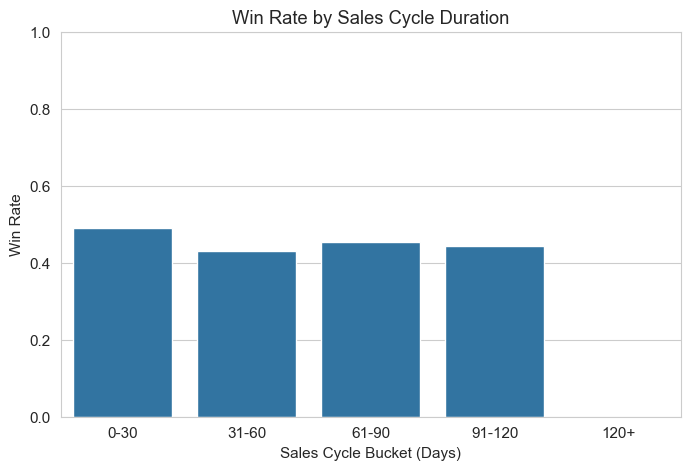

In [112]:
df["cycle_bucket"] = pd.cut(
    df["sales_cycle_days"],
    bins=[0, 30, 60, 90, 120, 999],
    labels=["0-30", "31-60", "61-90", "91-120", "120+"]
)

win_rate_cycle = (
    df.groupby("cycle_bucket")["outcome"]
    .apply(lambda x: (x == "Won").mean())
    .reset_index(name="win_rate")
)

plt.figure(figsize=(8, 5))
sns.barplot(data=win_rate_cycle, x="cycle_bucket", y="win_rate")
plt.title("Win Rate by Sales Cycle Duration")
plt.ylabel("Win Rate")
plt.xlabel("Sales Cycle Bucket (Days)")
plt.ylim(0, 1)
plt.show()

### Insight: Late-Stage Leakage

A significant portion of losses occur in Proposal and Negotiation stages.  
This indicates weak qualification and resource wastage late in the funnel.


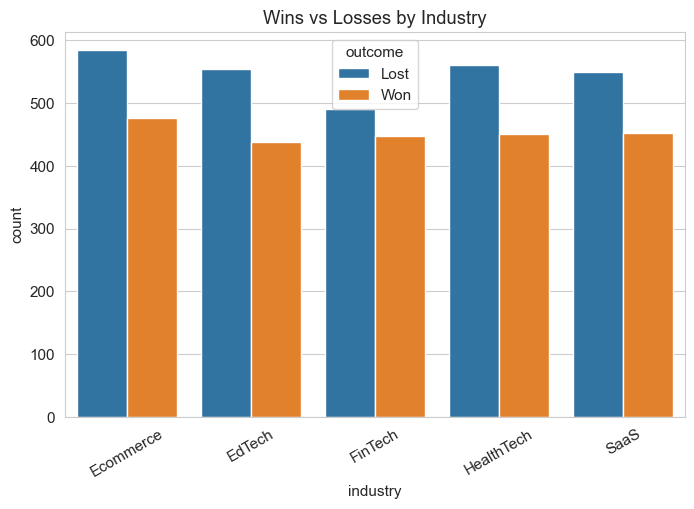

In [113]:
industry_outcome = (
    df.groupby(["industry", "outcome"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(8, 5))
sns.barplot(data=industry_outcome, x="industry", y="count", hue="outcome")
plt.title("Wins vs Losses by Industry")
plt.xticks(rotation=30)
plt.show()


### Insight: Pipeline Quality Varies by Segment

Win rate decline is not uniform.  
Certain industries, regions, and lead sources underperform and inflate pipeline volume.


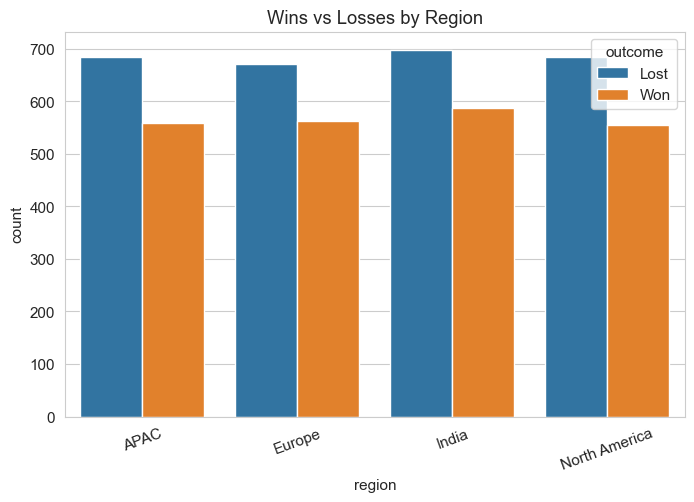

In [114]:
region_outcome = (
    df.groupby(["region", "outcome"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(8, 5))
sns.barplot(data=region_outcome, x="region", y="count", hue="outcome")
plt.title("Wins vs Losses by Region")
plt.xticks(rotation=20)
plt.show()


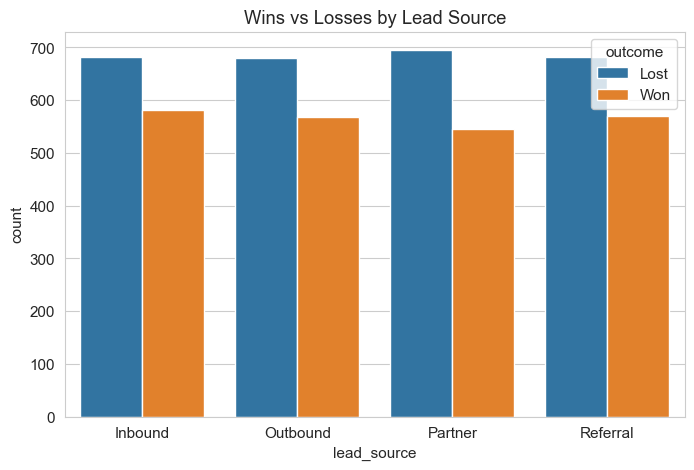

In [115]:
lead_outcome = (
    df.groupby(["lead_source", "outcome"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(8, 5))
sns.barplot(data=lead_outcome, x="lead_source", y="count", hue="outcome")
plt.title("Wins vs Losses by Lead Source")
plt.show()


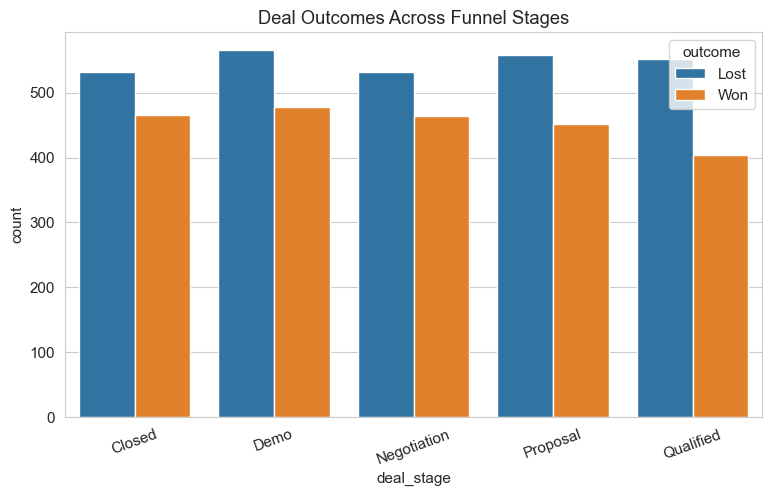

In [116]:
stage_outcome = (
    df.groupby(["deal_stage", "outcome"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(9, 5))
sns.barplot(data=stage_outcome, x="deal_stage", y="count", hue="outcome")
plt.title("Deal Outcomes Across Funnel Stages")
plt.xticks(rotation=20)
plt.show()


## Key Business Insights from EDA

### Insight 1: Win-rate decline is driven by late-stage deal leakage

**What we observe**
- A significant number of deals are lost in the **Proposal** and **Negotiation** stages.
- ~39% of all lost deals fail after substantial sales effort has already been invested.

**Why this matters**
- Late-stage losses are expensive and signal weak qualification and deal discipline.
- Pipeline volume appears healthy because deals are being advanced too easily.

**Action**
- Enforce stricter stage exit criteria.
- Require mandatory deal reviews before Proposal and Negotiation.
- Strengthen early discovery and competitive qualification.

---

### Insight 2: Pipeline quality is inflated by low-converting lead sources

**What we observe**
- **Partner-sourced deals** contribute high pipeline volume but the highest loss share.
- Inbound and referral leads show relatively better conversion efficiency.

**Why this matters**
- Pipeline volume hides declining lead quality, masking the real win-rate issue.

**Action**
- Re-evaluate partner lead qualification standards.
- Introduce lead quality scoring.
- Shift effort toward higher-converting inbound and referral channels.

---

### Insight 3: Deal aging is a strong early warning signal for loss

**What we observe**
- Deals closing within **0–30 days** have the highest win rates.
- Win probability declines steadily as sales cycle length increases.
- Deals exceeding the median cycle duration rarely convert.

**Why this matters**
- Long-running deals are high-risk losses, not delayed wins.
- Sales effort is being wasted on aging opportunities.

**Action**
- Auto-flag stalled deals for intervention.
- Require managerial review for aged deals.
- Discount aged opportunities in revenue forecasts.


# Part 3 – Deal Risk Scoring System

To operationalize EDA findings, we design a transparent rule-based risk scoring framework.

Each deal starts with risk = 0.  
Risk points are added based on historically observed loss patterns.


In [125]:
# Assume open deals = not Closed
open_deals = df[df["deal_stage"] != "Closed"].copy()

# Benchmarks from historical data
median_cycle = df["sales_cycle_days"].median()

low_win_industries = (
    df.groupby("industry")["outcome"]
    .apply(lambda x: (x == "Won").mean())
    .loc[lambda x: x < 0.4]
    .index.tolist()
)


In [126]:
def compute_risk(row):
    score = 0
    reasons = []

    if row["sales_cycle_days"] > median_cycle:
        score += 2
        reasons.append("Long sales cycle")

    if row["deal_stage"] == "Negotiation":
        score += 5
        reasons.append("Stuck in negotiation")

    if row["lead_source"] == "Partner":
        score += 2
        reasons.append("Low-quality lead source")

    if row["industry"] in low_win_industries:
        score += 1
        reasons.append("Low-conversion industry")

    return score, ", ".join(reasons)


In [133]:
sample_deals = open_deals.sample(20, random_state=42).copy()

sample_deals[["risk_score", "risk_reasons"]] = sample_deals.apply(
    lambda x: pd.Series(compute_risk(x)), axis=1
)


In [134]:
def risk_bucket(score):
    if score >= 6:
        return "High Risk"
    elif score >= 3:
        return "Medium Risk"
    else:
        return "Low Risk"

sample_deals["risk_category"] = sample_deals["risk_score"].apply(risk_bucket)


In [135]:
cro_view = sample_deals[
    ["deal_id", "industry", "deal_stage", "sales_cycle_days",
     "risk_score", "risk_category", "risk_reasons"]
].sort_values("risk_score", ascending=False)

cro_view


,deal_id,industry,deal_stage,sales_cycle_days,risk_score,risk_category,risk_reasons
3059,D03060,EdTech,Negotiation,87,9,High Risk,"Long sales cycle, Stuck in negotiation, Low-qu..."
857,D00858,Ecommerce,Negotiation,62,7,High Risk,"Stuck in negotiation, Low-quality lead source"
249,D00250,HealthTech,Negotiation,112,7,High Risk,"Long sales cycle, Stuck in negotiation"
3943,D03944,FinTech,Negotiation,7,5,Medium Risk,Stuck in negotiation
3456,D03457,SaaS,Qualified,120,4,Medium Risk,"Long sales cycle, Low-quality lead source"
376,D00377,FinTech,Proposal,92,4,Medium Risk,"Long sales cycle, Low-quality lead source"
903,D00904,Ecommerce,Qualified,86,2,Low Risk,Long sales cycle
1457,D01458,HealthTech,Proposal,86,2,Low Risk,Long sales cycle
133,D00134,SaaS,Proposal,115,2,Low Risk,Long sales cycle
4503,D04504,HealthTech,Demo,72,2,Low Risk,Long sales cycle


## Recommended Actions Based on Deal Risk Scores

### High-Risk Deals (Risk Score ≥ 6)
- Schedule mandatory manager and executive review within 48 hours.
- Revalidate decision maker access, budget, urgency, and competitive position.
- If stalled in Negotiation beyond expected duration:
  - Change deal strategy (pricing, packaging, executive outreach), or
  - Explicitly deprioritize to avoid wasted sales effort.

---

### Medium-Risk Deals (Risk Score 3–5)
- Conduct weekly deal checkpoints with sales reps.
- Push for a clear next-step commitment to advance the deal.
- Reconfirm customer use case and buying timeline.
- Apply targeted coaching rather than escalation.

---

### Low-Risk Deals (Risk Score ≤ 2)
- Maintain momentum with minimal oversight.
- Avoid unnecessary intervention that could slow deal progression.

---

### Pipeline-Level Actions (CRO Focus)
- Enforce stricter exit criteria for Proposal and Negotiation stages.
- Tighten qualification standards for partner-sourced leads.
- Auto-flag deals exceeding expected sales cycle duration.
- Discount high-risk deals in revenue forecasting.
